### Before you start: 
Make sure you have the following packages installed in your python environment:

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

In [39]:
# You may want to set a consistant palette when grading with colors are always consistent
sns.set_palette('husl')

# And you can also add a bunch of sns.set_xxx to make sure consistent formats for all seaborn plot
sns.set_style("whitegrid") 

### Prepare dataset:
Here I used random numbers to create my dataframe, you can also load dataset from your local machine

In [40]:
df = pd.DataFrame()

df['x'] = np.random.normal(100, 3, 300)
df['y'] = np.random.normal(10, 1, 300)
df['z'] = np.random.choice(['A', 'B', 'C'], 300)
df['w'] = np.random.randint(1,5, size=300)
df['c'] = np.random.choice(['big', 'small', 'medium'], 300)


print(df.info())
print()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
x    300 non-null float64
y    300 non-null float64
z    300 non-null object
w    300 non-null int64
c    300 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 11.8+ KB
None

                x           y           w
count  300.000000  300.000000  300.000000
mean    99.865109    9.964102    2.583333
std      2.835933    1.107373    1.092566
min     92.168687    6.394764    1.000000
25%     98.205225    9.194166    2.000000
50%     99.828630    9.969101    3.000000
75%    101.518225   10.813305    4.000000
max    109.821087   12.800632    4.000000


### Explore the data
Make sure you understand the data before running models
#### Distribution plot
Ususally include histogram, boxplot

[Text(0, 0.5, 'Probability'),
 Text(0.5, 0, 'x'),
 Text(0.5, 1.0, 'Distribution of x')]

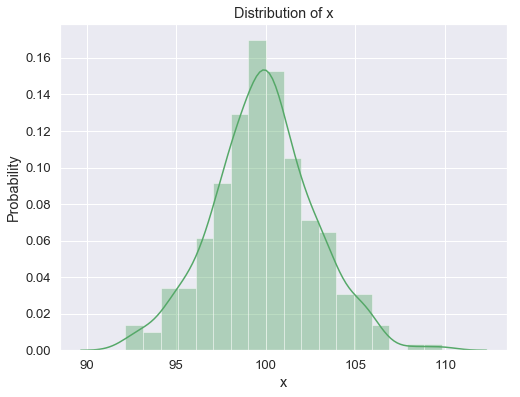

In [53]:
# histogram
plt.figure(figsize=(8,6))
g = sns.distplot(df['x'], color="g") # add kde=False if you donot want to see the guassian estimate
g.set(xlabel='x', ylabel='Probability', title='Distribution of x')
# g.spines['right'].set_visible(False)
# g.spines['left'].set_visible(False)
# plt.show()

[Text(0.5, 0, 'x'), Text(0.5, 1.0, 'Distribution of x')]

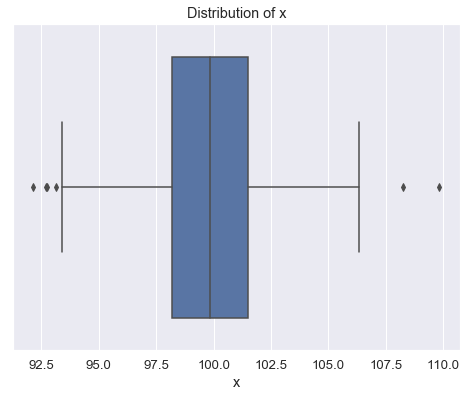

In [54]:
plt.figure(figsize=(8,6))
g = sns.boxplot(x=df['x'])
g.set(xlabel='x', title='Distribution of x')

[Text(-0.29999999999999716, 0.5, 'x'),
 Text(0.5, 21.200000000000003, 'z'),
 Text(0.5, 1.0, 'x versus z')]

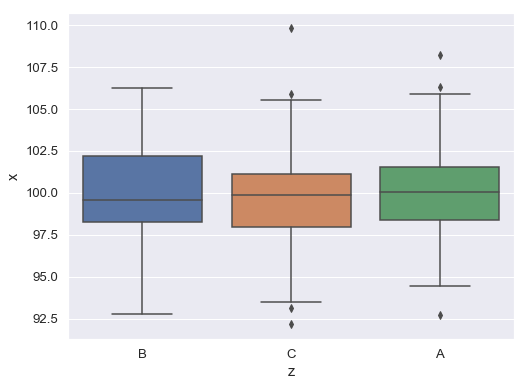

In [56]:
# boxplot sometimes is used in multiple categorical variables:
plt.figure(figsize=(8,6))
g = sns.boxplot(y="x", x="z", data=df)
g.set(xlabel='z', ylabel='x', title='x versus z')

[Text(0, 0.5, 'z'),
 Text(0.5, 0, 'x'),
 Text(0.5, 1.0, 'x versus z with different c')]

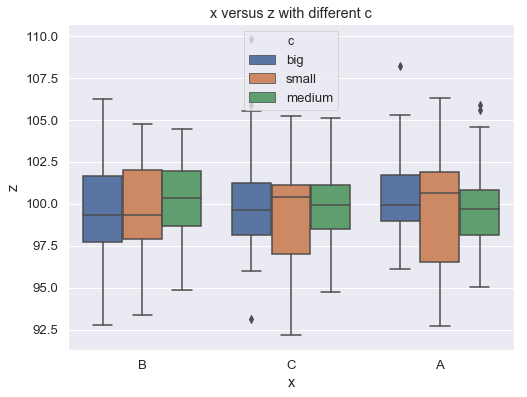

In [57]:
plt.figure(figsize=(8,6))
g = sns.boxplot(y="x", x='z', hue="c", data=df)
g.set(xlabel='x', ylabel='z', title='x versus z with different c')

[Text(21.200000000000003, 0.5, 'z'),
 Text(0.5, 21.200000000000003, 'x'),
 Text(0.5, 1.0, 'x versus z with different c')]

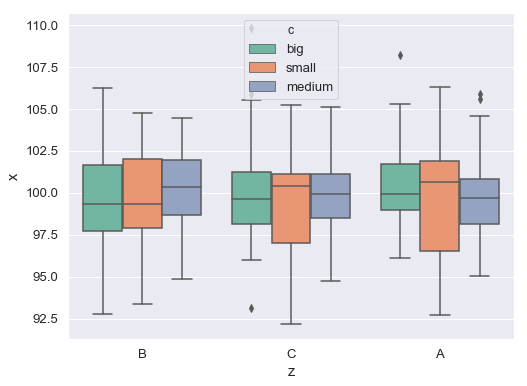

In [58]:
# to specific a differnet palette
plt.figure(figsize=(8,6))
sns.boxplot(y="x", x='z', hue="c", data=df, palette="Set2")
g.set(xlabel='x', ylabel='z', title='x versus z with different c')

##### for categorical varialbes, usualy bar plot with counts helps to understand the distribution

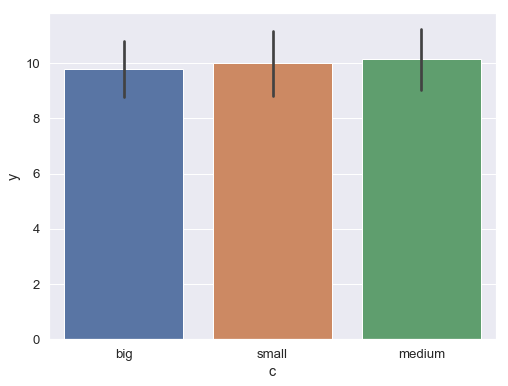

In [63]:
plt.figure(figsize=(8,6))
sns.barplot(x="c", y="y", data=df,ci="sd")

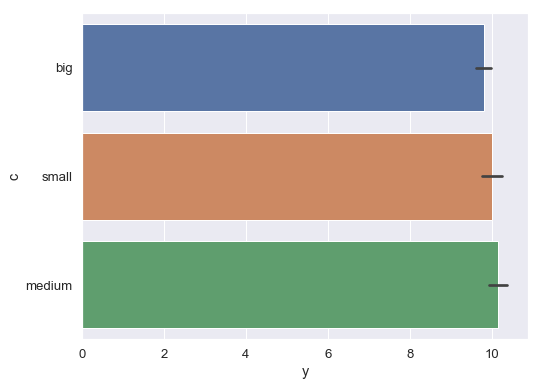

In [64]:
# change the order of x and y
plt.figure(figsize=(8,6))
sns.barplot(x="y",y="c", data=df)

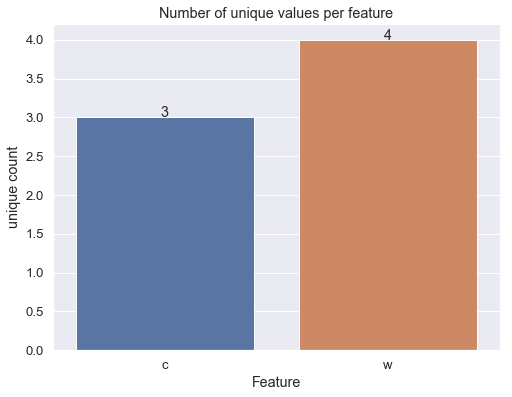

In [70]:
# count the number of unique features
plt.figure(figsize=(8,6))
cols = ['c','w']
uniques = [len(df[col].unique()) for col in cols]
ax = sns.barplot(cols, uniques)
ax.set(xlabel='Feature', ylabel='unique count', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            uniq,
            ha="center")

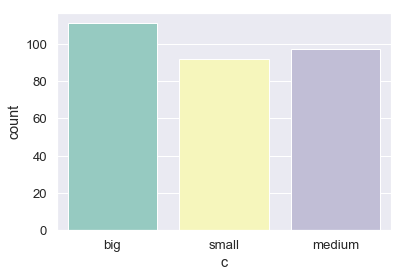

In [66]:
# count the number of values inside one column
sns.countplot(x="c", data=df, palette="Set3")

In [78]:
# show percentage and ranking
df_group = df.groupby('c').mean()
groupedvalues = df_group.iloc[df['x'].abs().argsort()[::-1]].reset_index()
groupedvalues['x'] = groupedvalues['x'].abs()
#groupedvalues=df_model.reindex(df_model[col].abs().sort_values(col, ascending=False))
plt.figure(figsize=(8,6))
#plt.rcParams["axes.labelsize"] = 15
g = sns.barplot(x='x', y='c',data=groupedvalues,palette="Greens_d")
for p in g.patches:
    width = p.get_width()
    g.text(width,
            p.get_y()+p.get_height()/2. + 0.2,
            "{0:.1f}%".format(width/groupedvalues['x'].sum()*100),
            ha="left", fontsize=12)
g.grid(False)
g.set_title('Importance ranking regrading '+'y',fontsize=15)
g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)
plt.show()

IndexError: positional indexers are out-of-bounds